<h3>Lógica Difusa - Taller 4 - Control Difuso</h3>

In [3]:
# Librerías requeridas
import numpy as np
from matplotlib import pyplot as plt
from fuzzy import *

In [18]:
#
# Aplicación de lógica difusa para el control de posición.
# Profesor Guía: Claudio Morales Díaz 
# Santiago, Chile, 2020.
# 

<h4>1. Definimos las variables linguistica de entrada y salida</h4>

In [19]:
# Universo de discurso para el error
e = np.linspace(-20, 20, 100)
# Funciones de pertenencia para el error
ENG = trapmf(e, [-20, -20, -10, -5])
ENP = trimf(e, [-10, -5, 0])
EC = trimf(e, [-5, 0, 5])
EPP = trimf(e, [0, 5, 10])
EPG = trapmf(e, [5, 10, 20, 20])

# Universo de discurso para el voltaje del motor
v = np.linspace(-12, 12, 100)

# Funciones de pertenencia para el error
VNG = trapmf(v, [-12, -12, -6, -3])
VNP = trimf(v, [-6, -3, 0])
VC = trimf(v, [-3, 0, 3])
VPP = trimf(v, [0, 3, 6])
VPG = trapmf(v, [3, 6, 12, 12])

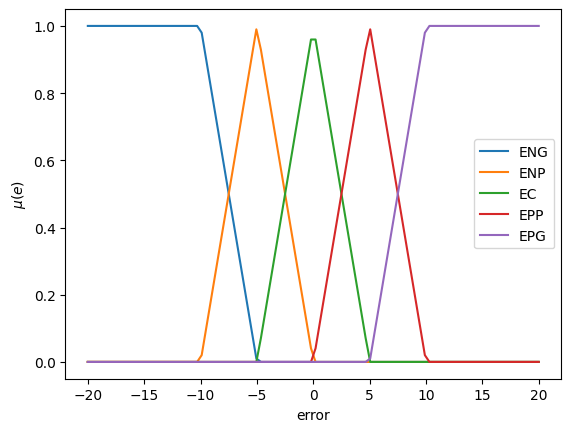

In [20]:
#gráficos para el error
plt.plot(e, ENG, label="ENG")
plt.plot(e, ENP, label="ENP")
plt.plot(e, EC, label="EC")
plt.plot(e, EPP, label="EPP")
plt.plot(e, EPG, label="EPG")
plt.legend(loc='best')
plt.xlabel('error')
plt.ylabel('$\mu (e)$')
plt.show()

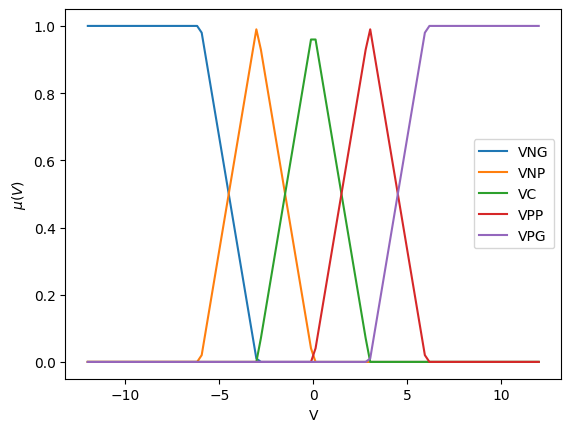

In [21]:
#gráficos para el voltaje
plt.plot(v, VNG, label="VNG")
plt.plot(v, VNP, label="VNP")
plt.plot(v, VC, label="VC")
plt.plot(v, VPP, label="VPP")
plt.plot(v, VPG, label="VPG")
plt.legend(loc='best')
plt.xlabel('V')
plt.ylabel('$\mu (V)$')
plt.show()

<h4>2. Fuzzificación</h4>

val_ENG = 0.0
val_ENP = 0.0
val_EC = 0.0
val_EPP = 0.6
val_EPG = 0.4


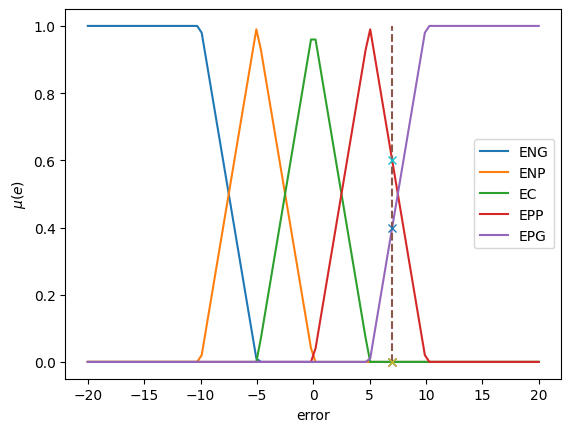

In [22]:
e0 = 7 #el valor de error actual

#Fuzzificar: encontrar la pertenencia de e0 a cada conjunto difuso de entrada
val_ENG = trapmf(e0, [-20, -20, -10, -5])
val_ENP = trimf(e0, [-10, -5, 0])
val_EC = trimf(e0, [-5, 0, 5])
val_EPP = trimf(e0, [0, 5, 10])
val_EPG = trapmf(e0, [5, 10, 20, 20])

#Visualicemos los valores
print('val_ENG =',val_ENG)
print('val_ENP =',val_ENP)
print('val_EC =',val_EC)
print('val_EPP =',val_EPP)
print('val_EPG =',val_EPG)

#Graficamos para visualizar sus posiciones
plt.plot(e, ENG, label="ENG")
plt.plot(e, ENP, label="ENP")
plt.plot(e, EC, label="EC")
plt.plot(e, EPP, label="EPP")
plt.plot(e, EPG, label="EPG")
plt.legend(loc='best')

plt.plot([e0, e0], [0.0, 1.0], linestyle="--")
plt.plot(e0, val_ENG, 'x')
plt.plot(e0, val_ENP, 'x')
plt.plot(e0, val_EC, 'x')
plt.plot(e0, val_EPP, 'x')
plt.plot(e0, val_EPG, 'x')
plt.xlabel('error')
plt.ylabel('$\mu (e)$')
plt.show()


<h4>3. Método de Inferencia </h4>

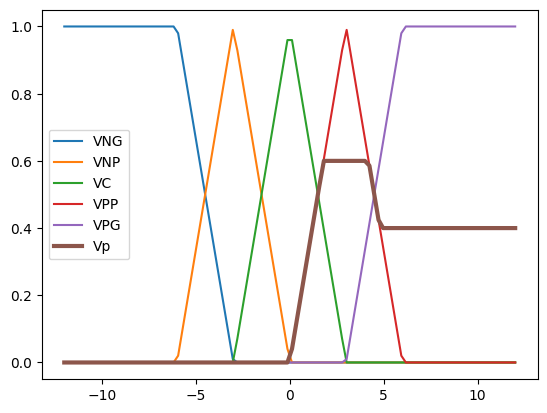

In [23]:
# Se calculan las funciones cortadas
VNGp = cut(val_ENG, VNG)
VNPp = cut(val_ENP, VNP)
VCp = cut(val_EC, VC)
VPPp = cut(val_EPP, VPP)
VPGp = cut(val_EPG, VPG)

# se unen
Vp = union([VNGp, VNPp, VCp, VPPp, VPGp])

# y graficamos
plt.plot(v, VNG, label="VNG")
plt.plot(v, VNP, label="VNP")
plt.plot(v, VC, label="VC")
plt.plot(v, VPP, label="VPP")
plt.plot(v, VPG, label="VPG")
plt.plot(v, Vp, label="Vp", linewidth=3)
plt.legend(loc='best')
plt.show()

<h4>4. Defuzzificación </h4>

In [24]:
# Aplicamos defuzzificación
out_centroid = defuzz(v, Vp, 'centroid')
out_bisector = defuzz(v, Vp, 'bisector')
out_MOM = defuzz(v, Vp, 'MOM')
out_SOM = defuzz(v, Vp, 'SOM')
out_LOM = defuzz(v, Vp, 'LOM')

In [25]:
# Los valores son:
print ('out_centroid = ', out_centroid)
print ('out_bisector = ', out_bisector)
print ('out_MOM = ', out_MOM)
print ('out_SOM = ', out_SOM)
print ('out_LOM = ', out_LOM)

out_centroid =  5.966848940533156
out_bisector =  5.454545454545453
out_MOM =  2.909090909090909
out_SOM =  1.8181818181818183
out_LOM =  4.0


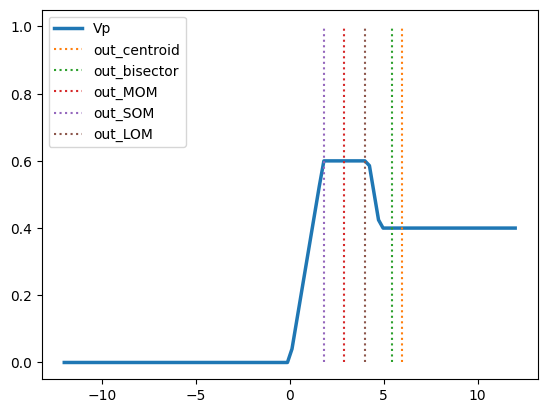

In [26]:
#Graficamos para comparar
#Graficamos para visualizar sus posiciones

plt.plot(v, Vp, linewidth=2.5, linestyle="-", label="Vp")
plt.plot([out_centroid, out_centroid], [0, 1], linestyle=":", label="out_centroid")
plt.plot([out_bisector, out_bisector], [0, 1], linestyle=":", label="out_bisector")
plt.plot([out_MOM, out_MOM], [0, 1], linestyle=":", label="out_MOM")
plt.plot([out_SOM, out_SOM], [0, 1], linestyle=":", label="out_SOM")
plt.plot([out_LOM, out_LOM], [0, 1], linestyle=":", label="out_LOM")
plt.legend(loc='best')
plt.show()

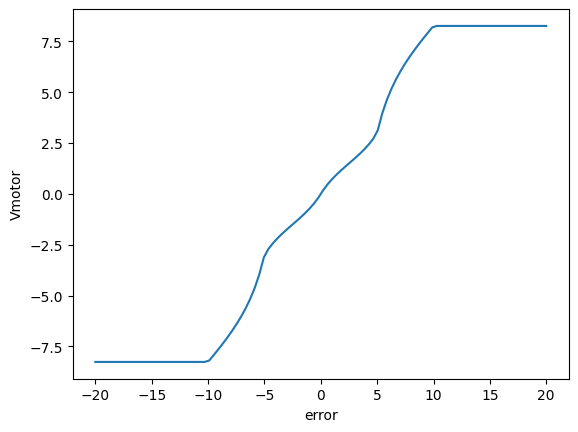

In [27]:
#EXTRA: Gráfico de la superficie de control
# La superficie de control (o curvas de controlador) permiten
# visualizar la salida del controlador para los distintos valores de error.

e = np.linspace(-20, 20, 100) # entrada (error)
out = np.zeros(e.size)        # salida (voltaje)

for i in range(e.size):
    val = float(e[i])
    
    #fuzzificar
    val_ENGi = trapmf(val, [-20, -20, -10, -5])
    val_ENPi = trimf(val, [-10, -5, 0])
    val_ECi = trimf(val, [-5, 0, 5])
    val_EPPi = trimf(val, [0, 5, 10])
    val_EPGi = trapmf(val, [5, 10, 20, 20])
    
    #cortar
    VNGpi = cut(val_ENGi, VNG)
    VNPpi = cut(val_ENPi, VNP)
    VCpi = cut(val_ECi, VC)
    VPPpi = cut(val_EPPi, VPP)
    VPGpi = cut(val_EPGi, VPG)

    #Unir
    Vp = union([VNGpi, VNPpi, VCpi, VPPpi, VPGpi])
    
    #defuzzificar
    out[i] = defuzz(v, Vp, 'centroid')
    
plt.plot(e, out)
plt.xlabel('error')
plt.ylabel('Vmotor')
plt.show()


<h3>Procedimiento abreviado para uso con la librería <i>fuzzy.py</i></h3>

out: 1.9962136545593576


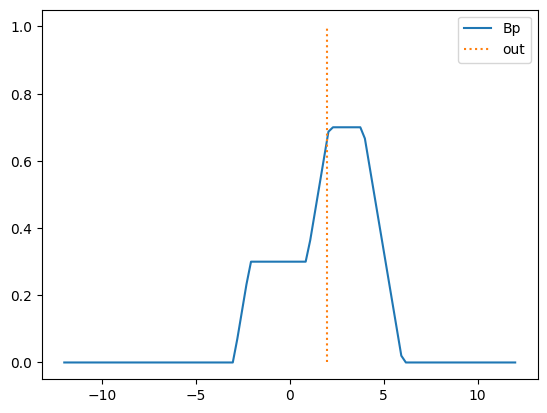

In [28]:
# 1. Definir universo de discurso para entrada y salida
x = np.linspace(-20, 20, 100)
y = np.linspace(-12, 12, 100)

# 2. Definir las funciones de membresía para reglas de control
#    en la forma "Si x es Ai, entonces y es Bi"
A1 = [trapmf, [-20, -20, -10, -5]]
A2 = [trimf, [-10, -5, 0]]
A3 = [trimf, [-5, 0, 5]]
A4 = [trimf, [0, 5, 10]]
A5 = [trapmf, [5, 10, 20, 20]]

B1 = [trapmf, [-12, -12, -6, -3]]
B2 = [trimf, [-6, -3, 0]]
B3 = [trimf, [-3, 0, 3]]
B4 = [trimf, [0, 3, 6]]
B5 = [trapmf, [3, 6, 12, 12]]

A = [A1, A2, A3, A4, A5]
B = [B1, B2, B3, B4, B5]

# 3. Implementar el Modus Ponens a partir de un valor de entrada
x0 = 3.5
Bp = fuzz(x0, y, A, B)

# 4. Defuzzificar para obtener la salida
out = defuzz(y, Bp, 'centroid')

print("out:", out)
plt.plot(y, Bp, label="Bp")
plt.plot([out, out], [0, 1], linestyle=":", label="out")
plt.legend(loc='best')
plt.show()

In [29]:
# ¿Cuánto tarda el proceso de cálculo?
from time import time  #importamos la librería para medir tiempo
t_inicial = time()

#  medimos desde aquí --->
Bp = fuzz(x0, y, A, B)
out = defuzz(y, Bp, 'centroid')
# ---> hasta aquí

t_final = time() 
print("Tiempo de ejecucion:", t_final - t_inicial)

Tiempo de ejecucion: 0.0017116069793701172


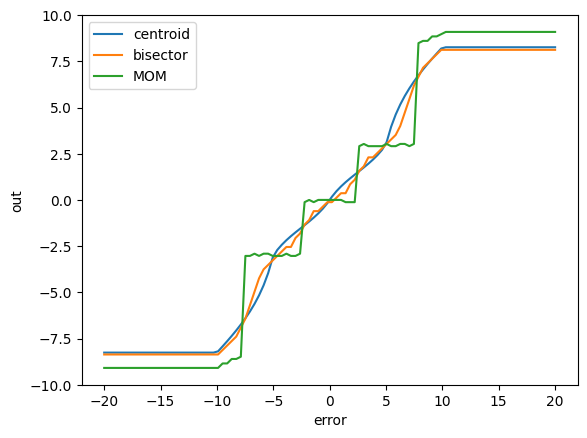

In [30]:
# Curvas de control para los distintos métodos de defuzzificación:
out_centroid = np.zeros(x.size)
out_bisector = np.zeros(x.size)
out_MOM = np.zeros(x.size)
out_SOM = np.zeros(x.size)
out_LOM = np.zeros(x.size)
    
for i in range(x.size):
    x0 = float(x[i])
    Bp = fuzz(x0, y, A, B)
    out_centroid[i] = defuzz(y, Bp, 'centroid')
    out_bisector[i] = defuzz(y, Bp, 'bisector')
    out_MOM[i] = defuzz(y, Bp, 'MOM')
    out_SOM[i] = defuzz(y, Bp, 'SOM')
    out_LOM[i] = defuzz(y, Bp, 'LOM')
    
plt.plot(x, out_centroid, label="centroid")
plt.plot(x, out_bisector, label="bisector")
plt.plot(x, out_MOM, label="MOM")
#pl.plot(x, out_SOM, label="SOM")
#pl.plot(x, out_LOM, label="LOM")
plt.legend()
plt.xlabel('error')
plt.ylabel('out')
plt.show()

<h3>Taller 5 - Control Difuso </h3> <br>
Repita el ejemplo de control de posición para atender a los siguientes requerimientos:<br>
1. Definir solo tres valores linguisticos para el error de posición: error negativo, error cero y error positivo.<br>
2. Definir solo tres valores linguisticos para el voltaje el motor: voltaje negativo, voltaje cero y voltaje positivo.<br>
3. Realizar el proceso de fuzzificación y defuzzificación para todos los posibles valores de error y obtener la curva de control para los métodos de bisectriz, centroide y MOM.

In [31]:
# Escriba sus respuestas aquí